# Airbnb Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\\Gomathy\\2. Study_Platforms\\4. Intellipaat\\The_Python_Course\\Airbnb_data.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Data Cleaning / Preparation

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
rename_col = {'id':'listing_id', 'name':'listing_name', 'number_of_reviews':'total_reviews', 'calculated_host_listings_count':'host_listings_count'}


In [6]:
df = df.rename(columns=rename_col)
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [10]:
df['listing_name'].fillna('unknown', inplace = True)
df['host_name'].fillna('no_name', inplace = True)

In [11]:
df.drop(columns='last_review', inplace = True)

In [12]:
df['reviews_per_month'].fillna(0, inplace = True)

In [13]:
df.isnull().sum()

listing_id             0
listing_name           0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
total_reviews          0
reviews_per_month      0
host_listings_count    0
availability_365       0
dtype: int64

In [14]:
df['listing_id'].nunique()

48895

In [15]:
df['neighbourhood'].nunique()

221

In [16]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
df['neighbourhood_group'].nunique()

5

In [18]:
df['host_id'].nunique()

37457

### Checking Outliers

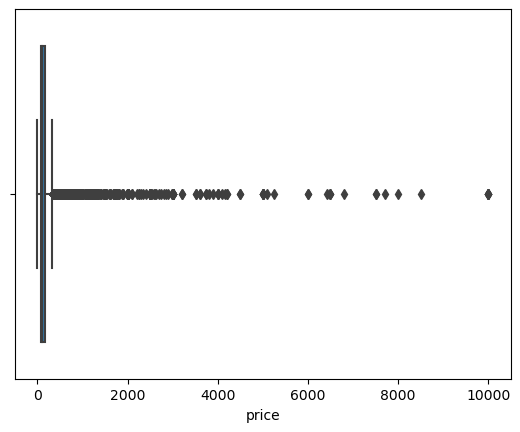

In [19]:
sns.boxplot(x='price', data=df)
plt.show()

### Remove outliers using IQR

In [20]:
Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)
IQR = Q3 - Q1
lr = Q1 - (1.5 * IQR) # Lower range
ur = Q3 + (1.5 * IQR) # Upper range


In [21]:
df = df[(df['price'] > lr) & (df['price'] < ur)]
df.shape


(45918, 15)

### Exploratory Data Analysis (EDA)

#### Evaluation of the Distribution of Airbnb Prices

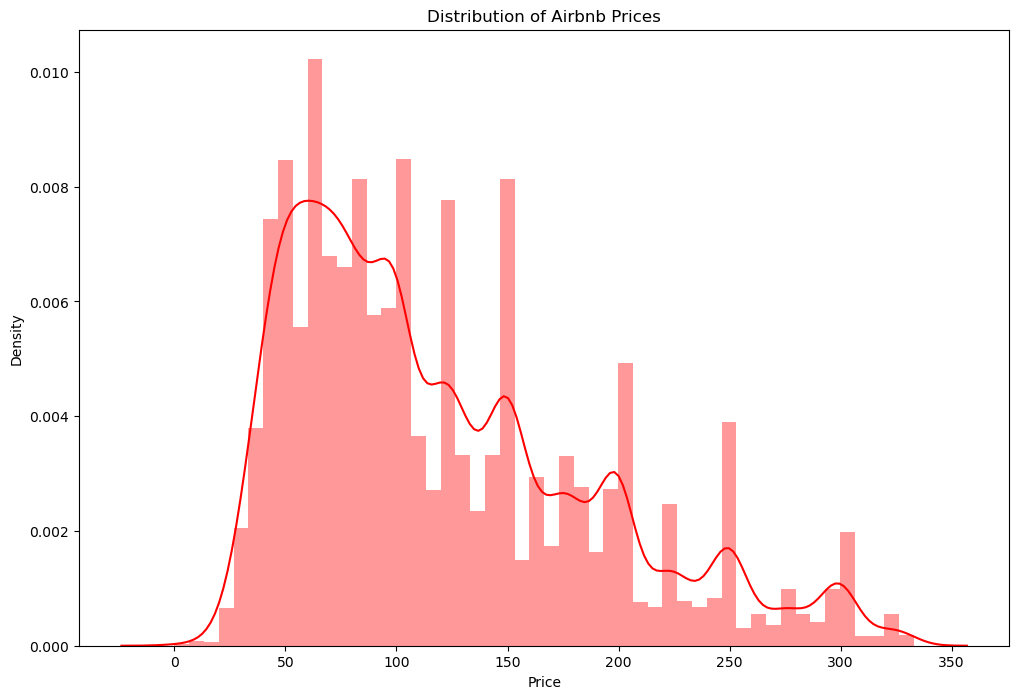

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'], color='r')
plt.xlabel('Price')
plt.title('Distribution of Airbnb Prices')
plt.show()

#### Observations
- Most of the prices fall within the range of 0 to 150 dollars.

#### Airbnb Listings Count by Neighborhood Group

In [23]:
counts = df['neighbourhood_group'].value_counts()
counts

neighbourhood_group
Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: count, dtype: int64

In [24]:
Top_neighbourhood_groups = counts.reset_index()
Top_neighbourhood_groups

,neighbourhood_group,count
0,Manhattan,19501
1,Brooklyn,19415
2,Queens,5567
3,Bronx,1070
4,Staten Island,365


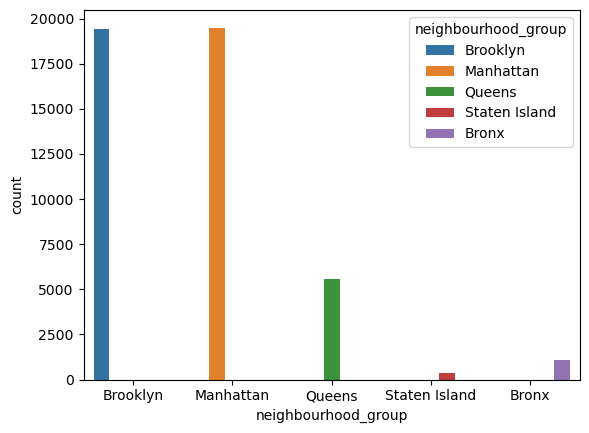

In [25]:
sns.countplot(x='neighbourhood_group', hue='neighbourhood_group',data=df)
plt.show()

#### Observations
- The table highlights Manhattan as the neighborhood group with the highest count of Airbnb listings Conversely, Staten Island shows the lowest count.

#### Average Price Of Each Neighborhood Group

In [26]:
grouped = df.groupby('neighbourhood_group')['price'].mean()
grouped

neighbourhood_group
Bronx             77.365421
Brooklyn         105.699614
Manhattan        145.904620
Queens            88.904437
Staten Island     89.235616
Name: price, dtype: float64

In [27]:
ng_ap = grouped.reset_index()
ng_ap = round(ng_ap.rename(columns={'price':'avg_price'}), 2)
ng_ap

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


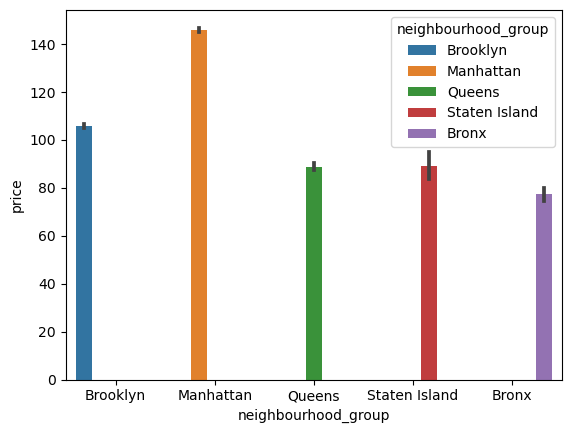

In [28]:
sns.barplot(x='neighbourhood_group', y='price', hue = 'neighbourhood_group', data = df)
plt.show()

#### Observations
- The average listing price in New York City varies widely by neighborhood. Manhattan has the highest average at 146 dollars per day, while the Bronx has the lowest at around 77 dollars per day.

#### Implications of Airbnb Listings by Room Type

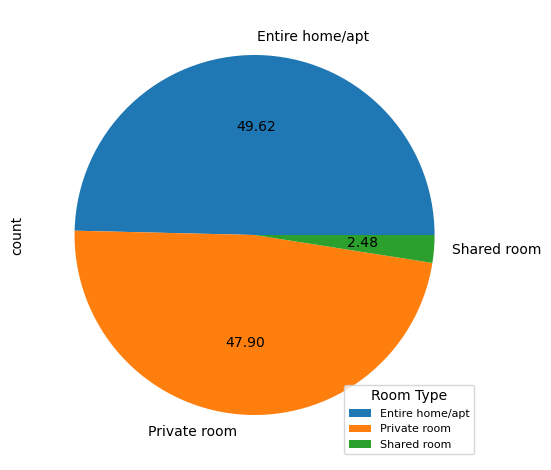

In [29]:
df['room_type'].value_counts().plot.pie(autopct='%.2f')
plt.legend(title = 'Room Type', fontsize = 8)
plt.tight_layout()
plt.show()

In [30]:
top_room_type = df['room_type'].value_counts()
top_room_type

room_type
Entire home/apt    22784
Private room       21996
Shared room         1138
Name: count, dtype: int64

#### Observations
- Among the listed room types, "Entire home/apt" has the highest number of bookings.
- The next preference "Private room," followed by "Shared room," which is the least preferred option among the listed room types.

#### Reviews Count by Neighborhood Group

In [31]:
df2 = df.groupby('neighbourhood_group')['total_reviews'].sum()
df2

neighbourhood_group
Bronx             28185
Brooklyn         475936
Manhattan        428128
Queens           155719
Staten Island     11536
Name: total_reviews, dtype: int64

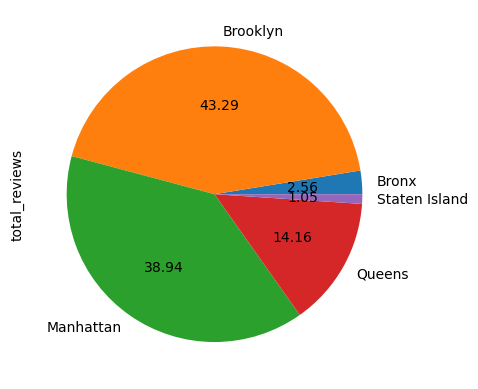

In [32]:
df2.plot.pie(autopct="%.2f")
plt.show()

#### Observations
- Brooklyn emerges with the highest total reviews among neighborhood groups, followed closely by Manhattan.
- Queens and the Bronx have notable review counts, while Staten Island shows the lowest review count.

#### Room Type Distribution Across Neighborhood Groups

In [33]:
df.groupby('neighbourhood_group')['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         648
                     Entire home/apt      363
                     Shared room           59
Brooklyn             Private room       10062
                     Entire home/apt     8942
                     Shared room          411
Manhattan            Entire home/apt    11289
                     Private room        7747
                     Shared room          465
Queens               Private room        3351
                     Entire home/apt     2022
                     Shared room          194
Staten Island        Private room         188
                     Entire home/apt      168
                     Shared room            9
Name: count, dtype: int64

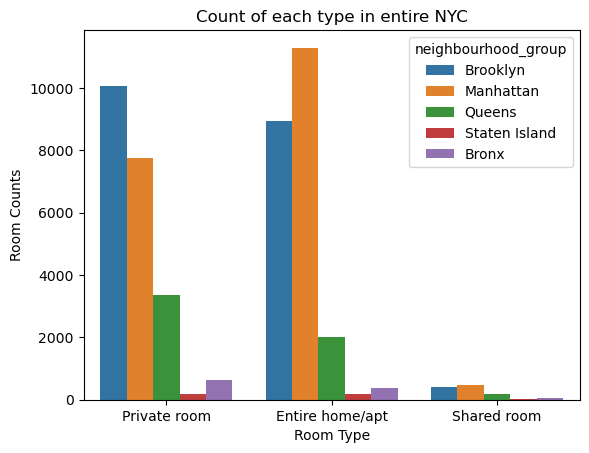

In [34]:
sns.countplot(x='room_type', hue='neighbourhood_group', data=df)
plt.title('Count of each type in entire NYC')
plt.xlabel('Room Type')
plt.ylabel('Room Counts')
plt.show()

#### Observations
- In the neighborhood group, Manhattan has the highest number of room listings, while Staten Island has the least.

#### Analyzing Correlations

In [35]:
correlation = df.corr(numeric_only= True)
correlation

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
listing_id,1.000000,0.581439,-0.008072,0.101403,-0.018180,-0.013841,-0.320428,0.178978,0.125179,0.073188
host_id,0.581439,1.000000,0.015965,0.144330,-0.034812,-0.017972,-0.136529,0.208308,0.147276,0.193673
latitude,-0.008072,0.015965,1.000000,0.091354,0.068789,0.025853,-0.012515,-0.017978,0.021285,-0.017492
longitude,0.101403,0.144330,0.091354,1.000000,-0.306922,-0.064128,0.053831,0.140512,-0.107333,0.097181
price,-0.018180,-0.034812,0.068789,-0.306922,1.000000,0.031141,-0.027547,-0.047207,0.172891,0.066179
minimum_nights,-0.013841,-0.017972,0.025853,-0.064128,0.031141,1.000000,-0.082851,-0.127749,0.133237,0.146329
total_reviews,-0.320428,-0.136529,-0.012515,0.053831,-0.027547,-0.082851,1.000000,0.593832,-0.070357,0.183707
reviews_per_month,0.178978,0.208308,-0.017978,0.140512,-0.047207,-0.127749,0.593832,1.000000,-0.050757,0.171570
host_listings_count,0.125179,0.147276,0.021285,-0.107333,0.172891,0.133237,-0.070357,-0.050757,1.000000,0.225251
availability_365,0.073188,0.193673,-0.017492,0.097181,0.066179,0.146329,0.183707,0.171570,0.225251,1.000000


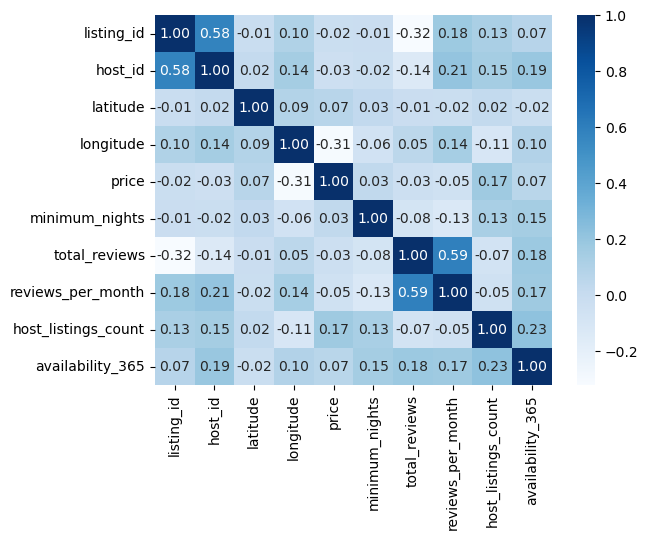

In [36]:
sns.heatmap(correlation, cmap='Blues', annot=True, fmt='.2f')
plt.show()

#### Observations
- There is a positive correlation coefficient between total reviews and reviews per month.
- Other positive correlation relationship between two variables are host id and listing id.

#### Calculate mean median std for prices by Room type

In [37]:
room_type_summary = df.groupby('room_type')['price'].agg([np.mean,np.median,np.std])
room_type_summary

,mean,median,std
room_type,,,
Entire home/apt,162.489466,150.0,63.339807
Private room,79.018503,70.0,41.177512
Shared room,59.293497,45.0,42.832023


#### Price variation across neighborhood groups

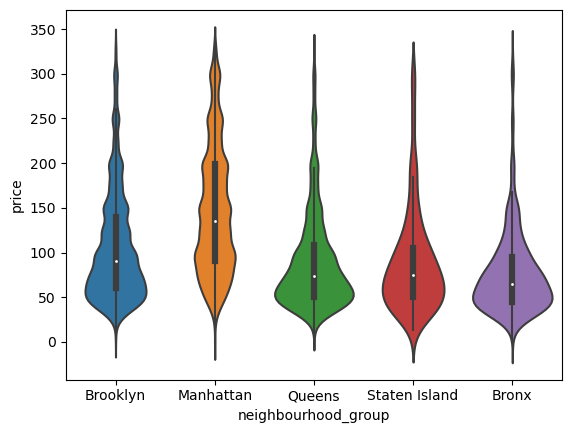

In [38]:
sns.violinplot(x='neighbourhood_group', y='price', data=df)
plt.show()

#### Observations
- Price distribution is very high in Manhattan and Brooklyn when compared to other neighbourhood groups.

#### Price Distribution of each Room Type

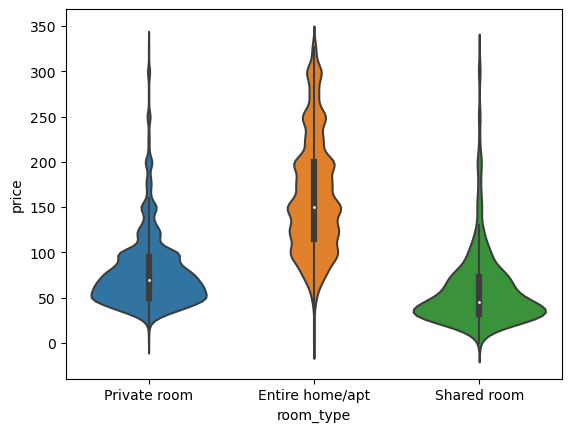

In [39]:
sns.violinplot(x='room_type', y='price', data=df)
plt.show()

#### Observations
- When compared to other room types, the price distribution for 'Entire home/apt' is very high.